# R&A | DS Task | APMC/Mandi Machine Learning

### AIM :
### 1.) To understand trends in APMC (Agricultural produce market committee)/mandi price & quantity arrival data for different commodities in Maharashtra.

### 2.)To predict the future trends of price for different commodities


In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # visualisation library
%matplotlib inline
import seaborn as sns
month_data = pd.read_csv('Monthly_data_cmo.csv')
month_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,Bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,Bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,Wheat(Husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,Wheat(Husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,Sorgum(Jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


### Dataset Discription

* **APMC** : Agricultural produce market committee . 

* **Commodity** : Agricultural/Non Agricultural Products .

* **Year**: Year of Production.

* **Month**: Month of Production.

* **arrivals_in_qtl**: Quantity arrived in quintals.

* **min_price**: Minimum Price charged per quintal.

* **max_price**: Maximum Price charged per quintal.

* **modal_price**: Modal or Average Price charged per quintal.

* **date**: Date of arrival .

* **district_name**: District of production.

* **state_name**: State of Production (Maharastra in our case).


#### Size

In [2]:
print('This dataset has ' + str(month_data.shape[0]) + ' rows, and ' + str(month_data.shape[1]) + ' columns')

This dataset has 62429 rows, and 11 columns


#### Numeric Features Description

In [3]:
month_data.describe()

,Year,arrivals_in_qtl,min_price,max_price,modal_price
count,62429.000000,6.242900e+04,6.242900e+04,6.242900e+04,62429.000000
mean,2015.337503,6.043088e+03,2.945228e+03,3.688814e+03,3296.003989
std,0.690451,3.470331e+04,1.318396e+04,7.662962e+03,3607.792534
min,2014.000000,1.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,2015.000000,3.800000e+01,1.250000e+03,1.600000e+03,1450.000000
50%,2015.000000,2.110000e+02,1.976000e+03,2.797000e+03,2425.000000
75%,2016.000000,1.364000e+03,3.900000e+03,4.647000e+03,4257.000000
max,2016.000000,1.450254e+06,3.153038e+06,1.600090e+06,142344.000000


#### Columns

In [4]:
month_data.columns

Index(['APMC', 'Commodity', 'Year', 'Month', 'arrivals_in_qtl', 'min_price',
       'max_price', 'modal_price', 'date', 'district_name', 'state_name'],
      dtype='object')

#### DataFrame Dictionary

In [5]:
Data_dict = pd.DataFrame(month_data.dtypes)
Data_dict['MissingVal'] = month_data.isnull().sum()
Data_dict['UniqueVal'] = month_data.nunique()
Data_dict['Count'] = month_data.count()
Data_dict = Data_dict.rename(columns = {0:'DataType'})
Data_dict

,DataType,MissingVal,UniqueVal,Count
APMC,object,0,349,62429
Commodity,object,0,352,62429
Year,int64,0,3,62429
Month,object,0,12,62429
arrivals_in_qtl,int64,0,11169,62429
min_price,int64,0,8503,62429
max_price,int64,0,9739,62429
modal_price,int64,0,9327,62429
date,object,0,27,62429
district_name,object,0,33,62429


### Data Preprocessing

* **Things I observed :**



* It's good that we don't have missing values or NAN's in our dataset.But there are certain issues that we need to figure out. 


* Names of similar commodity with different spelling or cases like 'sugarcane' and 'sugar-cane' also the upper and lower case names.There were names with spaces around their names. So for the sake of uniqueness just convert the names to lowercase and strip the spaces around them.


* As it is a real world dataset misleading values tend to creap in which could ultimately produces vague or misleading results. Things I've noticed is that the price section of our dataset (min_price,max_price,modal_price) contains a large amount of zero entries.Minimum and Maximum price could be ignored but it's the modal price that we need to concerned .


* The min price of some the products are greater than the max price.The modal price is greater than the max price and in some cases lower than min price.


In [ ]:
def preprocessing(df):
    
    #for names issues
    #for lowercasing the names of the commodities
    month_data['Commodity'] = month_data['Commodity'].apply(lambda x:x.lower())
    #for stripping the spaces around them
    month_data['Commodity'] = month_data['Commodity'].map(lambda x:x.strip())
    
    ##########################################################################
    
    #for handling zeroes
    #placing min of max_price and modal_price in place of zero min_price
    month_data['min_price'] = month_data.apply(
    lambda row: min(row['max_price'],row['modal_price']) if row['min_price']==0 else row['min_price'],axis=1)
    #what if minimum is zero so do it again
    month_data['min_price'] = month_data.apply(
    lambda row: max(row['max_price'],row['modal_price']) if row['min_price']==0 else row['min_price'],axis=1)
    
    #placing max of min_price and modal_price in place of zero max_price
    month_data['max_price'] = month_data.apply(
    lambda row: max(row['min_price'],row['modal_price']) if row['max_price']==0 else row['max_price'],axis=1)
    
    #placing main of min_price and max_price in place of zero modal_price
    month_data['modal_price'] = month_data.apply(
    lambda row: min(row['min_price'],row['max_price']) if row['modal_price']==0 else row['modal_price'],axis=1)
    
    #############################################################################
    
    #for handling min max 
    #placing min of min_price and max_price where min_price > max_price
    month_data['min_price'] = month_data.apply(
    lambda row: min(row['min_price'],row['max_price']) if row['min_price']>row['max_price'] else row['min_price'],axis=1)
    
    #placing min of min_price and max_price where modal_price > max_price
    month_data['modal_price'] = month_data.apply(
    lambda row: min(row['min_price'],row['max_price']) if row['modal_price']>row['max_price'] else row['modal_price'],axis=1)
    
    #placing min of min_price and max_price where modal_price < min_price
    month_data['modal_price'] = month_data.apply(
    lambda row: min(row['min_price'],row['max_price']) if row['modal_price']<row['min_price'] else row['modal_price'],axis=1)

In [6]:
month_data = pd.read_csv('preprocessed_mandi.csv',sep = ',')
month_data.head()

,APMC,Commodity,Year,Month,arrivals_in_qtl,min_price,max_price,modal_price,date,district_name,state_name
0,Ahmednagar,bajri,2015,April,79,1406,1538,1463,2015-04,Ahmadnagar,Maharashtra
1,Ahmednagar,bajri,2016,April,106,1788,1925,1875,2016-04,Ahmadnagar,Maharashtra
2,Ahmednagar,wheat(husked),2015,April,1253,1572,1890,1731,2015-04,Ahmadnagar,Maharashtra
3,Ahmednagar,wheat(husked),2016,April,387,1750,2220,1999,2016-04,Ahmadnagar,Maharashtra
4,Ahmednagar,sorgum(jawar),2015,April,3825,1600,2200,1900,2015-04,Ahmadnagar,Maharashtra


### After preprocessing saved the dataframe in a new csv named 'preprocessed_mandi.csv'

### Lets do some EDA(Exploratory Data Analysis)

In [7]:
### Average quintals across year
average_2k14 = month_data[month_data['Year']==2014].arrivals_in_qtl.mean()
average_2k15 = month_data[month_data['Year']==2015].arrivals_in_qtl.mean()
average_2k16 = month_data[month_data['Year']==2016].arrivals_in_qtl.mean()
print("Average quantites arrived in 3 month of 2014: {0:.2f} qtl , followed by 12 months of 2015: {1:.2f} qtl , and 11 month of 2016: {2:.2f} qtl".format(
average_2k14,average_2k15,average_2k16))

Average quantites arrived in 3 month of 2014: 6321.49 qtl , followed by 12 months of 2015: 6243.08 qtl , and 11 month of 2016: 5790.74 qtl


In [8]:
#monthly arrival of commodities 
month_data.groupby('Year').Month.value_counts()

Year  Month    
2014  November     2097
      December     2077
      October      1900
      September    1827
2015  December     2739
      November     2413
      October      2308
      June         2153
      September    2134
      January      2089
      August       2036
      July         2030
      April        1936
      March        1933
      February     1927
      May          1859
2016  January      2769
      June         2753
      May          2752
      February     2698
      October      2679
      November     2673
      March        2595
      September    2557
      August       2518
      April        2509
      July         2468
Name: Month, dtype: int64

In [9]:
### Average modal price across year
average_price_2k14 = month_data[month_data['Year']==2014].modal_price.mean()
average_price_2k15 = month_data[month_data['Year']==2015].modal_price.mean()
average_price_2k16 = month_data[month_data['Year']==2016].modal_price.mean()
print("Average modal price in 3 month of 2014: Rs {0:.2f} per qtl  , followed by 12 months of 2015: Rs {1:.2f} per qtl , and 11 month of 2016: Rs {2:.2f} per qtl".format(
average_price_2k14,average_price_2k15,average_price_2k16))

Average modal price in 3 month of 2014: Rs 3002.07 per qtl  , followed by 12 months of 2015: Rs 3237.53 per qtl , and 11 month of 2016: Rs 3443.61 per qtl


In [10]:
# for sorting data by month
def category_month(temp):
    temp.index = pd.CategoricalIndex(temp.index, 
                               categories=['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], 
                               sorted=True)
    temp = temp.sort_index()
    temp = temp.drop('Year',axis = 1)
    temp.arrivals_in_qtl = temp.arrivals_in_qtl.round()
    temp.min_price = temp.min_price.round()
    temp.max_price = temp.max_price.round()
    temp.modal_price = temp.modal_price.round()

    return temp

## Trends In Months

In [11]:
#monthly discription of numerical data
average_across_month = month_data.groupby('Month').mean()

In [12]:
#lets plot it
average_across_month = category_month(average_across_month)

Text(0.5,1,'Quantity arrived across different months')

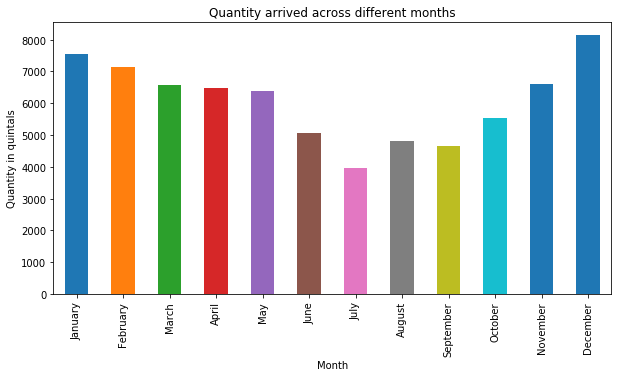

In [14]:
ax = average_across_month.arrivals_in_qtl.plot(kind = 'bar',figsize=(10,5));
ax.set_ylabel('Quantity in quintals')
ax.set_xlabel('Month')
ax.set_title('Quantity arrived across different months')

Text(0.5,1,'Price variation across months')

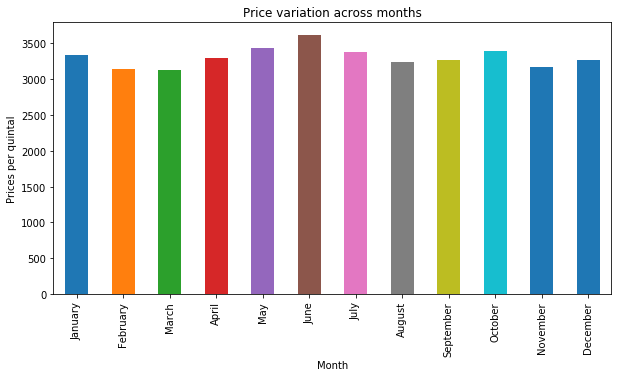

In [15]:
ax = average_across_month.modal_price.plot(kind = 'bar',figsize=(10,5));
ax.set_ylabel('Prices per quintal')
ax.set_xlabel('Month')
ax.set_title('Price variation across months');

* AS the supply decreases during monsoon due to various reasons prices tend to increase.

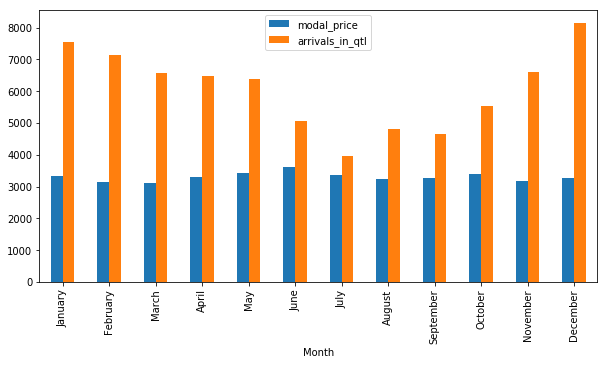

In [16]:
price_vs_quant = month_data[['Month','modal_price','arrivals_in_qtl']].groupby('Month').mean()
price_vs_quant.index = pd.CategoricalIndex(price_vs_quant.index, 
                               categories=['January', 'February', 'March', 'April','May','June', 'July', 'August','September', 'October', 'November', 'December'], 
                               sorted=True)
price_vs_quant = price_vs_quant.sort_index()
price_vs_quant.plot(kind = 'bar' , figsize=(10,5));

### Let's normalise the total price and quantities count to see the steady growth over the months .

In [17]:
#Lets count all numerical data
temp1 = month_data.groupby(['Month']).count()
temp1 = category_month(temp1)
temp1 = temp1.reset_index()

#A similar dataframe with sum of all numerical data
temp2 = month_data.groupby(['Month']).sum()
temp2 = category_month(temp2)
temp2 = temp2.reset_index()

In [18]:
normalised_df = pd.DataFrame()
normalised_df['Quantity'] = temp1['arrivals_in_qtl']
normalised_df['Price'] = temp2['modal_price']
normalised_df = (normalised_df - normalised_df.mean()) / normalised_df.std()#(normalised_df.max() - normalised_df.min()) 
normalised_df['Month'] = temp1['Month']

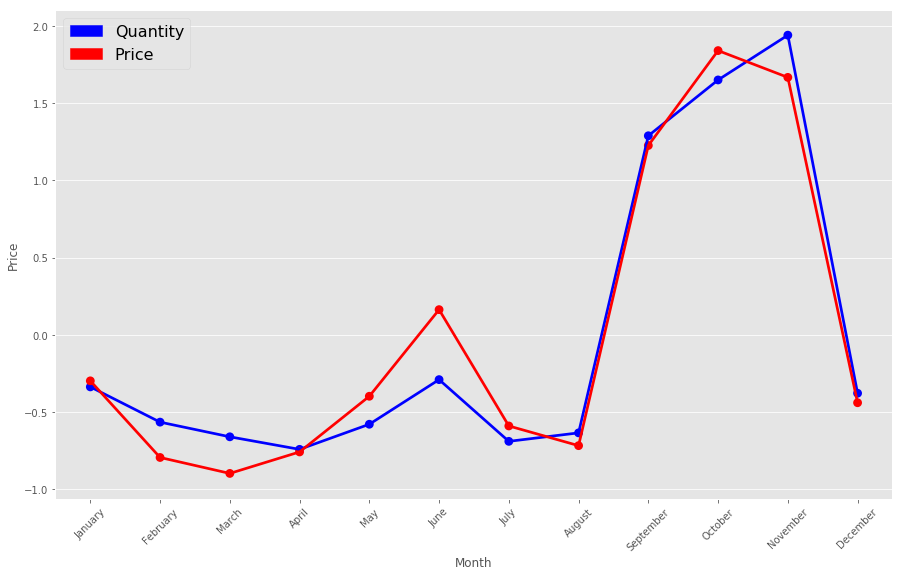

In [19]:
import matplotlib.patches as mpatches
plt.style.use('ggplot')
plt.figure(figsize=(15, 9))
ax = sns.pointplot(x = normalised_df.Month, y = normalised_df.Quantity, color = 'blue', label='Quantity')
ax = sns.pointplot(x = normalised_df.Month, y = normalised_df.Price, color = 'red', label='Price')

blue_patch = mpatches.Patch(color='blue', label='Quantity')
red_patch = mpatches.Patch(color='red', label='Price')
plt.legend(handles=[blue_patch, red_patch], loc='upper left', fontsize = 16)

plt.xticks(rotation=45);

* Could see a spike during the start of August

## Trends in Districts 

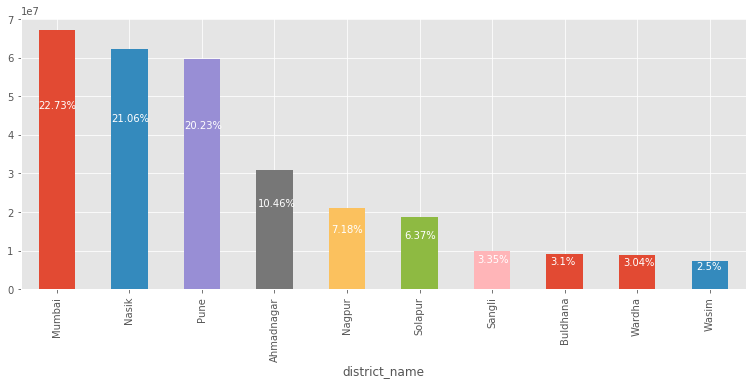

In [20]:
### Top 10 distributers in term of quantity
x = month_data.groupby(['district_name']).sum().copy()
ax = x.arrivals_in_qtl.sort_values(ascending=False)[:10].plot(kind='bar', figsize=(13, 5));

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_height())

# set individual bar lables using above list
total = sum(totals)

# set individual bar lables using above list
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()*1.007, i.get_height()*0.70, 
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=10,
                color='white')


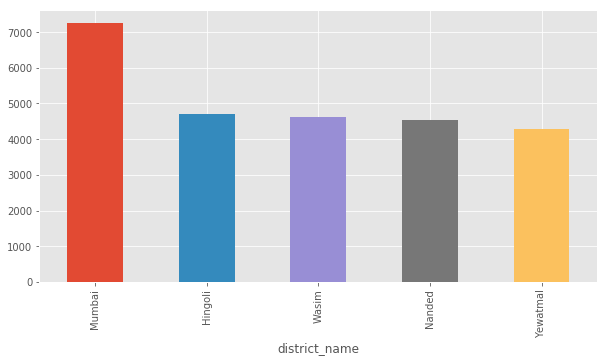

In [21]:
### Most expensive districts
month_data.groupby('district_name').modal_price.mean().sort_values(ascending = False)[:5].plot(kind = 'bar',figsize=(10,5));

### Correlation Matrix based on Districts

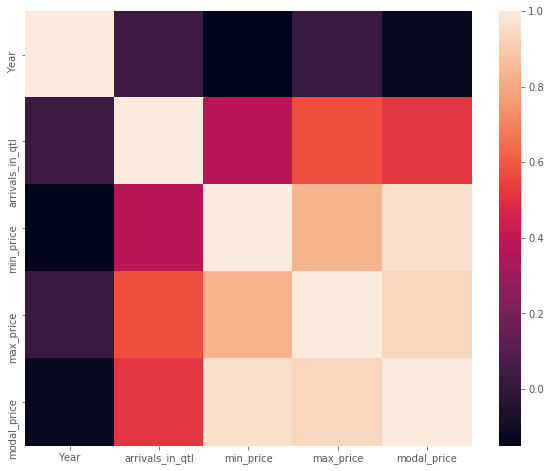

In [45]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 8))
corr = month_data.groupby('district_name').mean().corr()
sns.heatmap(corr,xticklabels=corr.columns.values,yticklabels=corr.columns.values,ax=ax);

* Modal Price and Quantity Arrival are moderately correlated.
* Min ,Max and Modal Price are highly correlated but they are understandable since they all fall under same category.

## Trends in commodity

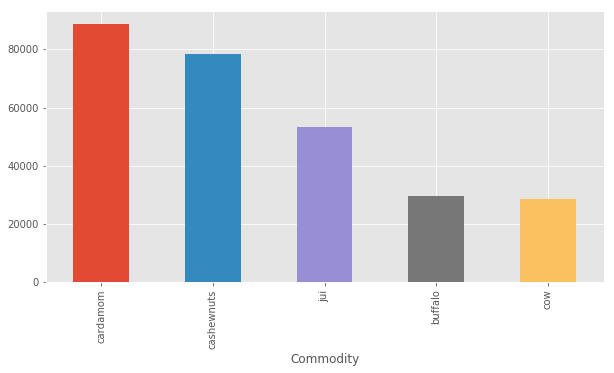

In [22]:
# most expensive commodity
month_data.groupby('Commodity').modal_price.mean().sort_values(ascending = False)[:5].plot(kind = 'bar',figsize=(10,5));

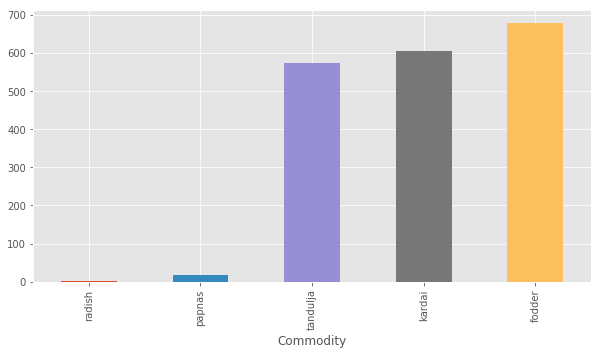

In [23]:
# Least expensive commodity
month_data.groupby('Commodity').modal_price.mean().sort_values()[:5].plot(kind = 'bar',figsize=(10,5));

* **Cardomom** the most expensive while **Radish** (which seems to me almost free) is the cheapest commodity.

In [24]:
Cardomom_p = month_data[month_data['Commodity']=='cardamom'].modal_price.mean()
Cardomom_q = month_data[month_data['Commodity']=='cardamom'].arrivals_in_qtl.mean()

Radish_p = month_data[month_data['Commodity']=='radish'].modal_price.mean()
Radish_q = month_data[month_data['Commodity']=='radish'].arrivals_in_qtl.mean()

print('Cardomom averages {0:.02f} qtl arrived @ Rs {1:.02f} per qtl while Radish averages {2:.02f} qtl arrived @ Rs {3:.02f} per qtl'.format(Cardomom_q,Cardomom_p,Radish_q,Radish_p))

Cardomom averages 500.93 qtl arrived @ Rs 88831.11 per qtl while Radish averages 450.00 qtl arrived @ Rs 3.25 per qtl


### Production percentage by month and monthly production across different districts

<Figure size 864x432 with 0 Axes>

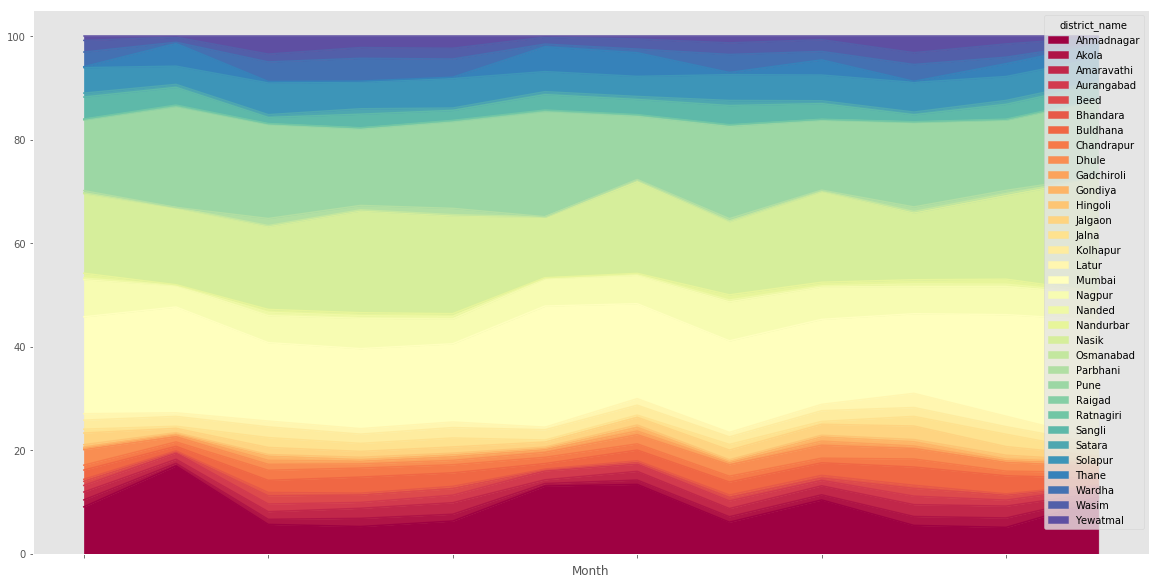

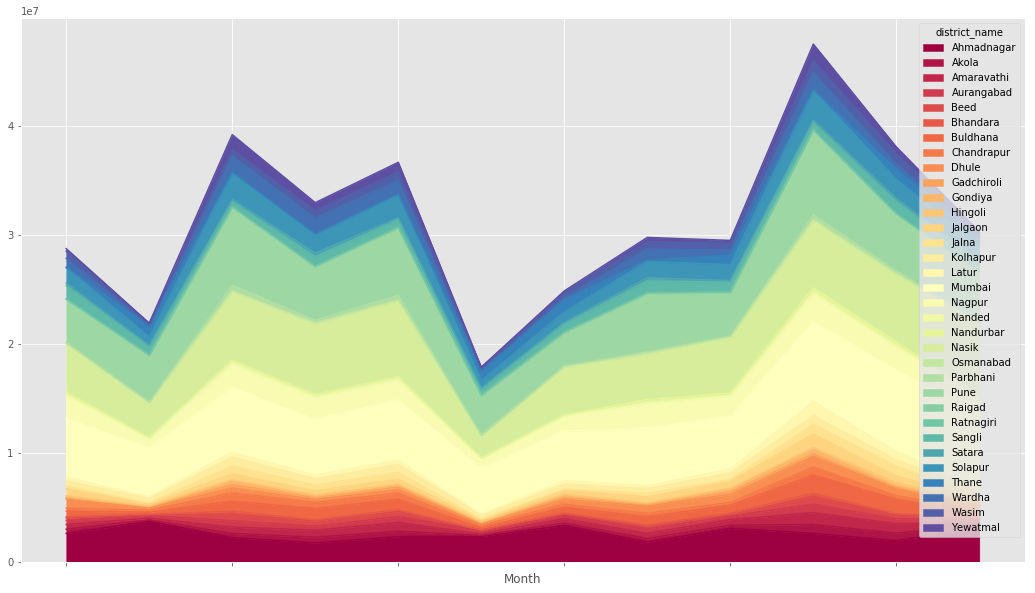

In [25]:
fig = plt.figure(figsize=(12, 6))

production_percentages_by_month = (month_data.groupby(['Month', 'district_name']).arrivals_in_qtl.sum())*(100)/month_data.groupby(['Month']).arrivals_in_qtl.sum()
production_percentages_by_month.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', grid=False, figsize=(20, 10))

monthlyProduction = month_data.groupby(['Month', 'district_name']).arrivals_in_qtl.sum()
monthlyProduction.unstack().plot(kind='area',stacked=True, colormap= 'Spectral', figsize=(18, 10) ) 

* The first visualisation is the area plot which basically represents the district with highest distribution percentage has the highest area.Could be observed Mumbai and Nagpur having the highest area throughout the year.

* The second one is also an area plot show the actual production of different districts throughout the year.Quantities peak at start and the end of the year.  

##  Detecting Outliers

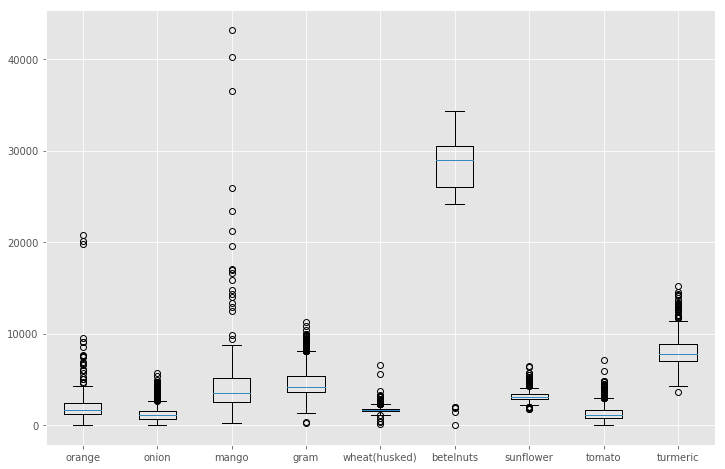

In [26]:
Some_of_the_outliers = ['orange', 'onion', 'mango', 'gram', 'wheat(husked)', 'betelnuts', 'sunflower', 'tomato', 'turmeric']

data_to_plot = []
for i in Some_of_the_outliers:
    data_to_plot.append(month_data[month_data['Commodity']==i].modal_price.values)
    
# Create a figure instance
fig = plt.figure(1, figsize=(12, 8))

# Create an axes instance

ax = fig.add_subplot(111)
# Create the boxplot
bp = ax.boxplot(data_to_plot)

ax.set_xticklabels(['orange', 'onion', 'mango', 'gram', 'wheat(husked)', 'betelnuts', 'sunflower', 'tomato', 'turmeric']);


## Trends Distribution 

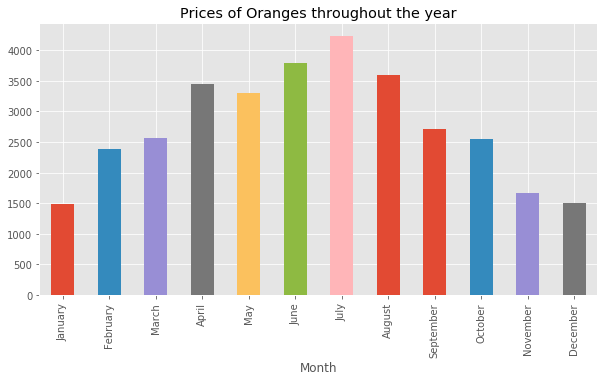

In [27]:
orange = month_data[month_data['Commodity']=='orange'].groupby('Month').mean()
orange = category_month(orange)
ax = orange.modal_price.plot(kind = 'bar',figsize = (10,5));
ax.set_title('Prices of Oranges throughout the year');

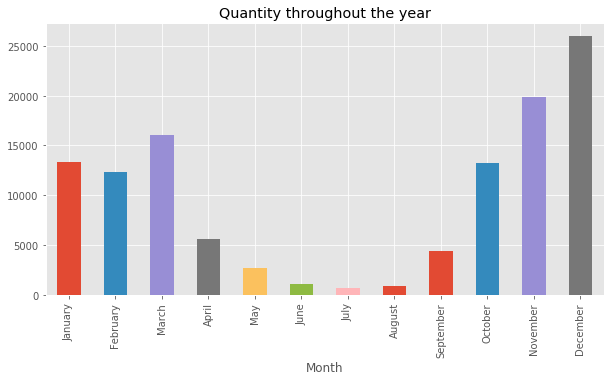

In [28]:
ax = orange.arrivals_in_qtl.plot(kind = 'bar',figsize = (10,5));
ax.set_title('Quantity throughout the year');

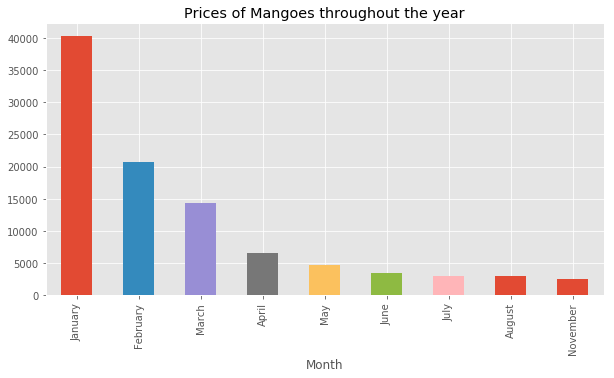

In [29]:
mango = month_data[month_data['Commodity']=='mango'].groupby('Month').mean()
mango = category_month(mango)
ax = mango.modal_price.plot(kind = 'bar',figsize = (10,5));
ax.set_title('Prices of Mangoes throughout the year');

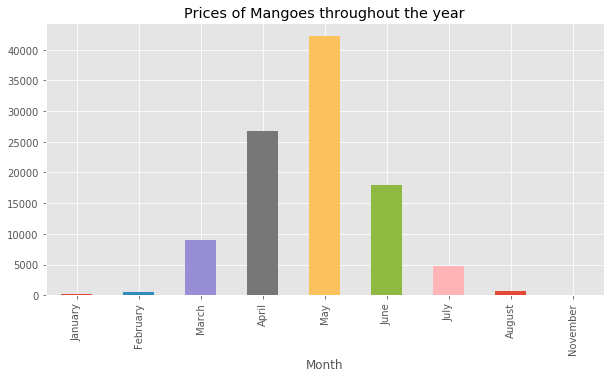

In [30]:
ax = mango.arrivals_in_qtl.plot(kind = 'bar',figsize = (10,5));
ax.set_title('Prices of Mangoes throughout the year');

## APMC

In [31]:
APMC = month_data.groupby('APMC').mean()
APMC = APMC.reset_index()
APMC.head(10)

,APMC,Year,arrivals_in_qtl,min_price,max_price,modal_price
0,Aamgaon,2015.259259,6402.037037,1510.222222,1594.037037,1552.481481
1,Aarni,2015.238095,3159.738095,4254.607143,4723.702381,4502.226190
2,Achalpur,2015.261538,1720.661538,3843.046154,4111.635897,3982.364103
3,Aheri,2015.301435,620.669856,3374.550239,3419.789474,3399.535885
4,Ahmednagar,2015.520801,5068.211094,2631.804314,3832.938367,3267.630200
5,Ahmedpur,2015.392361,359.128472,3631.406250,3859.125000,3786.190972
6,Akhadabalapur,2015.236364,443.684848,3823.721212,4066.000000,3944.660606
7,Akkalkuwa,2015.428571,379.642857,2632.535714,2930.285714,2811.107143
8,Akkolkot,2015.264706,1941.813725,4474.656863,4978.529412,4754.627451
9,Akluj,2015.234317,388.095941,1645.437269,2387.581181,2249.095941


### APMC Mean Distribution 

In [32]:
APMC = APMC.drop('Year',axis = 1)
APMC.arrivals_in_qtl = APMC.arrivals_in_qtl.round()
APMC.min_price = APMC.min_price.round()
APMC.max_price = APMC.max_price.round()
APMC.modal_price = APMC.modal_price.round()
APMC.head(10)

,APMC,arrivals_in_qtl,min_price,max_price,modal_price
0,Aamgaon,6402.0,1510.0,1594.0,1552.0
1,Aarni,3160.0,4255.0,4724.0,4502.0
2,Achalpur,1721.0,3843.0,4112.0,3982.0
3,Aheri,621.0,3375.0,3420.0,3400.0
4,Ahmednagar,5068.0,2632.0,3833.0,3268.0
5,Ahmedpur,359.0,3631.0,3859.0,3786.0
6,Akhadabalapur,444.0,3824.0,4066.0,3945.0
7,Akkalkuwa,380.0,2633.0,2930.0,2811.0
8,Akkolkot,1942.0,4475.0,4979.0,4755.0
9,Akluj,388.0,1645.0,2388.0,2249.0


In [33]:
# Maximum average arrivals 
APMC[APMC.arrivals_in_qtl==APMC.arrivals_in_qtl.max()]

,APMC,arrivals_in_qtl,min_price,max_price,modal_price
129,Junnar (Narayangaon),226557.0,775.0,1935.0,1671.0


In [34]:
### Exploring Junnar
Junnar = month_data[month_data.APMC=='Junnar (Narayangaon)'].groupby('Month').mean()
Junnar = category_month(Junnar)
Junnar

,arrivals_in_qtl,min_price,max_price,modal_price
Month,,,,
January,18645.0,2306.0,3516.0,2942.0
February,171615.0,633.0,1102.0,962.0
March,409346.0,858.0,2044.0,1900.0
April,270491.0,845.0,1998.0,1907.0
May,481276.0,489.0,1671.0,1638.0
June,220518.0,1804.0,3929.0,3788.0
July,45774.0,717.0,1563.0,1285.0
August,104318.0,267.0,1029.0,812.0
September,107843.0,256.0,693.0,632.0


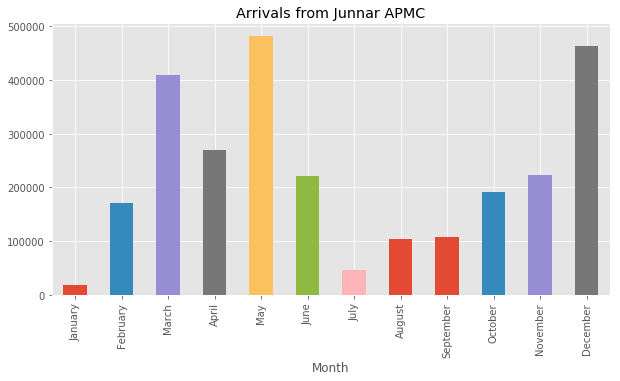

In [35]:
ax = Junnar.arrivals_in_qtl.plot(kind='bar',figsize=(10,5));
ax.set_title('Arrivals from Junnar APMC');

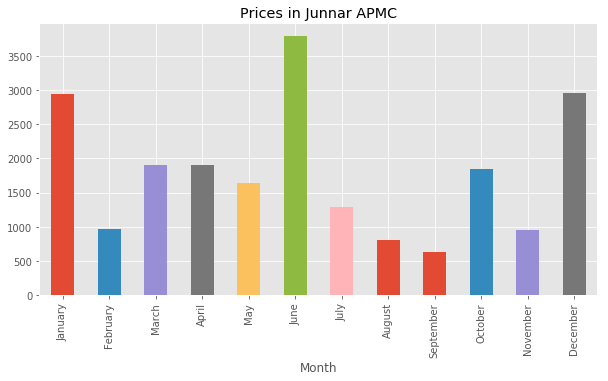

In [36]:
ax = Junnar.modal_price.plot(kind='bar',figsize=(10,5));
ax.set_title('Prices in Junnar APMC');

## Exploring Mandi Dataset 



In [46]:
mandi_msp_data = pd.read_csv('CMO_MSP_mandi.csv')
mandi_msp_data.head()

,commodity,year,Type,msprice,msp_filter
0,PADDY-UNHUSKED,2012,Kharif Crops,1250.0,1
1,RICE(PADDY-HUS),2012,Kharif Crops,1280.0,1
2,Jowar_Hybrid,2012,Kharif Crops,1500.0,1
3,SORGUM(JAWAR),2012,Kharif Crops,1520.0,1
4,BAJRI,2012,Kharif Crops,1175.0,1


### Dataset Description

In [47]:
print('This dataset has ' + str(mandi_msp_data.shape[0]) + ' rows, and ' + str(mandi_msp_data.shape[1]) + ' columns')

This dataset has 155 rows, and 5 columns


In [48]:
mandi_msp_data.describe()

,year,msprice,msp_filter
count,155.000000,145.000000,155.0
mean,2014.000000,2822.448276,1.0
std,1.418798,1441.725928,0.0
min,2012.000000,170.000000,1.0
25%,2013.000000,1470.000000,1.0
50%,2014.000000,2970.000000,1.0
75%,2015.000000,4000.000000,1.0
max,2016.000000,6240.000000,1.0


In [49]:
#Data Dictionary
Data_dict1 = pd.DataFrame(mandi_msp_data.dtypes)
Data_dict1['MissingVal'] = mandi_msp_data.isnull().sum()
Data_dict1['UniqueVal'] = mandi_msp_data.nunique()
Data_dict1['Count'] = mandi_msp_data.count()
Data_dict1 = Data_dict1.rename(columns = {0:'DataType'})
Data_dict1

,DataType,MissingVal,UniqueVal,Count
commodity,object,0,32,155
year,int64,0,5,155
Type,object,0,3,155
msprice,float64,10,97,145
msp_filter,int64,0,1,155


In [50]:
## filing the missing values of msprice with mean
mandi_msp_data['msprice'] = mandi_msp_data['msprice'].fillna(mandi_msp_data['msprice'].mean())
mandi_msp_data.isnull().sum()

commodity     0
year          0
Type          0
msprice       0
msp_filter    0
dtype: int64

In [51]:
#count of each commodity
mandi_msp_data.commodity.value_counts()

Masur_Yellow              5
COTTON                    5
MAIZE                     5
SPILT GERRN GRAM          5
NIGER-SEED                5
Copra (Ball)_Yellow       5
Ragi_Maldandi             5
SESAMUM                   5
PIGEON PEA (TUR)          5
PADDY-UNHUSKED            5
Cotton_Long Staple        5
SOYABEAN                  5
Copra (Milling)_Yellow    5
Jowar_Hybrid              5
Soyabean_Black            5
MUSTARD                   5
WHEAT(HUSKED)             5
Gram_Yellow               5
RICE(PADDY-HUS)           5
BAJRI                     5
Jute_Yellow               5
SUNFLOWER                 5
BARLI                     5
SAFFLOWER                 5
SPLIT BLACK GRAM          5
COCONUT                   5
SORGUM(JAWAR)             5
Toria_Yellow              5
WHEAT(UNHUSKED)           5
GR.NUT KERNELS            5
SUGAR-CANE                4
SUGARCANE                 1
Name: commodity, dtype: int64

### Data Preprocessing

In [52]:
mandi_msp_data['commodity'] = mandi_msp_data['commodity'].map(lambda x:'SUGARCANE' if x=='SUGAR-CANE' else x)
mandi_msp_data['commodity'] = mandi_msp_data['commodity'].apply(lambda x:x.lower())
mandi_msp_data['commodity'] = mandi_msp_data['commodity'].map(lambda x:x.strip())

### Exploratory Data Analysis

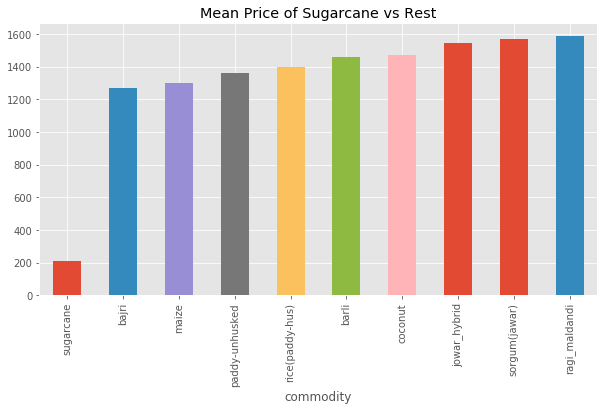

In [53]:
# Difference in Sugarcane mean price vs rest
ax = mandi_msp_data.groupby('commodity').msprice.mean().sort_values()[:10].plot(kind = 'bar',figsize=(10,5));
ax.set_title('Mean Price of Sugarcane vs Rest');

In [54]:
#removing the rest of the commdities
temp_df = mandi_msp_data[mandi_msp_data['commodity']!='sugarcane']
temp_df.reset_index(inplace=True)

In [55]:
temp_df = temp_df.drop('index',axis = 1)
temp_df.head()

,commodity,year,Type,msprice,msp_filter
0,paddy-unhusked,2012,Kharif Crops,1250.0,1
1,rice(paddy-hus),2012,Kharif Crops,1280.0,1
2,jowar_hybrid,2012,Kharif Crops,1500.0,1
3,sorgum(jawar),2012,Kharif Crops,1520.0,1
4,bajri,2012,Kharif Crops,1175.0,1


In [56]:
#mean price over the years
temp_df.groupby('year').msprice.mean()

year
2012    2713.000000
2013    2828.333333
2014    2870.166667
2015    2993.914943
2016    3141.901149
Name: msprice, dtype: float64

### Trends in prices over the years

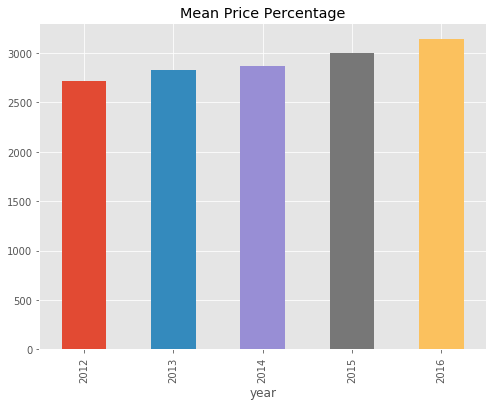

In [57]:
# plotting the above data
ax = temp_df.groupby('year').msprice.mean().plot(kind = 'bar',figsize=(8,6));
ax.set_title('Mean Price Percentage');
plt.show();

In [58]:
#grouping by type
temp_df.groupby('Type').msprice.mean()

Type
Kharif Crops    2892.943295
Other Crops     3783.500000
Rabi Crops      2509.614655
Name: msprice, dtype: float64

### Crop Type Distribution in dataset

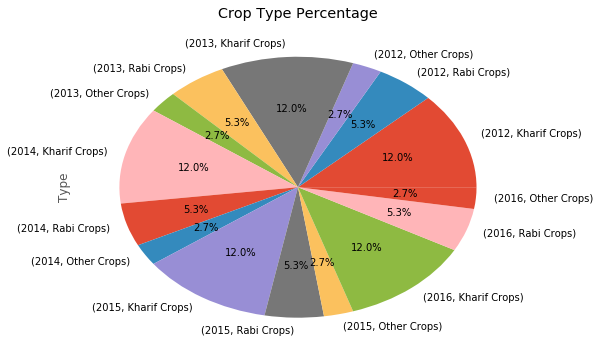

In [59]:
ax = temp_df.groupby('year').Type.value_counts().plot(kind = 'pie' , autopct='%1.1f%%',figsize=(8,6))
ax.set_title('Crop Type Percentage');
plt.show();

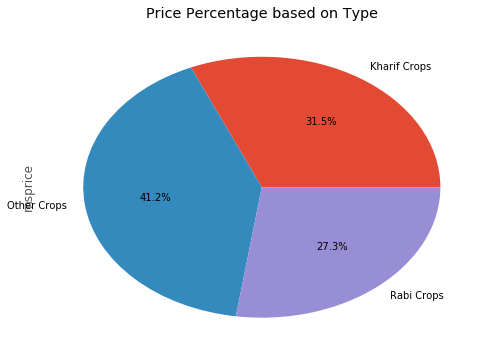

In [60]:
ax = temp_df.groupby('Type').msprice.mean().plot(kind = 'pie' , autopct='%1.1f%%',figsize = (8,6))
ax.set_title('Price Percentage based on Type');
plt.show();

In [61]:
print(temp_df[temp_df['Type']=='Kharif Crops'].msprice.max())
print(temp_df[temp_df['Type']=='Rabi Crops'].msprice.max())
print(temp_df[temp_df['Type']=='Other Crops'].msprice.max())

4800.0
3425.0
6240.0


In [62]:
print('Most expensive crops')
print("****************************************************************")
print(temp_df[temp_df['msprice']==4800])
print("****************************************************************")
print(temp_df[temp_df['msprice']==3425.0])
print("****************************************************************")
print(temp_df[temp_df['msprice']==6240])

Most expensive crops
****************************************************************
            commodity  year          Type  msprice  msp_filter
128  spilt gerrn gram  2016  Kharif Crops   4800.0           1
136           sesamum  2016  Kharif Crops   4800.0           1
****************************************************************
       commodity  year        Type  msprice  msp_filter
111  gram_yellow  2015  Rabi Crops   3425.0           1
****************************************************************
               commodity  year         Type  msprice  msp_filter
147  copra (ball)_yellow  2016  Other Crops   6240.0           1


In [63]:
# Copra (ball)_yellow vs Rest
most_exp = temp_df[temp_df['commodity']=='copra (ball)_yellow'].msprice.sum()/temp_df.msprice.sum()
rest_exp = temp_df[temp_df['commodity']!='copra (ball)_yellow'].msprice.sum()/temp_df.msprice.sum()
most_exp = most_exp*100
rest_exp = rest_exp*100
print('Copra (ball)_yellow accounts to {0:.02f} % while rest {1:.02f} % in terms of price'.format(most_exp,rest_exp))

Copra (ball)_yellow accounts to 6.51 % while rest 93.49 % in terms of price
